<a href="https://colab.research.google.com/github/JoshARogers/DATA_340_NLP/blob/main/hw2/HW2_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - Small Worlds
### Joshua Rogers
### DATA 340-02, Spring 2023
### February 23, 2023

## Q1
Go through the [tutorial on Small worlds](https://github.com/anwala/teaching-network-science/blob/main/spring-2023/week-3/data_340_02_s23_chp_02_small_worlds.ipynb).

Perform exercises 1 -- 3

### Answer

In [58]:
import networkx as nx
%matplotlib inline

In [59]:
G = nx.read_graphml('/content/drive/MyDrive/openflights_usa.graphml.gz')

#### Exercise 1

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.



In [60]:
nx.shortest_path(G, 'IND', 'FAI')

['IND', 'BOS', 'SEA', 'FAI']

#### Exercise 2

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?



In [61]:
nx.shortest_path(G, 'IND', 'FAI')

['IND', 'BOS', 'SEA', 'FAI']

#### Exercise 3

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [62]:
nx.is_connected(G)

False

In [ ]:
list(nx.connected_components(G))

In [64]:
nx.has_path(G, 'BOS', 'AKB')

False

### Discussion

Exercise 1: To find out if there was a direct path from Indianapolis to Fairbanks, I used the shortest path function, which finds the shortest path between two nodes. The shortest path found has has two "layovers", which would mean that there is not a direct flight between the two locations. 

Exercise 2: Just as I did in Exercise 2, I used shortest path to find an itinerary with the fewest possible number of flights. It pulled an itinerary with two layovers: one in Boston, and one in Seattle. In this case, the path length would be 3. 

Exercise 3. In this exercise, I used the is_connected function to see if the this graph is completely connected. The item returned false, which means that the graph wasn't completely connected. Then, I retrieved a list of connected comoponents, which returned several airports not connected with the rest. Lastly, I tested to see if there was a path between Boston international (BOS) Atka (Alaska) Airport (AKB). Since that returned false, that confirmed what nx.is_connected returned. 

## Q2

What is the central idea behind the notion of "six degrees of separation"? 

a. Social networks have high clustering coefficients

b. Social networks are sparse

c. Social networks have many high-degree nodes

d. Social networks have small average path lengths

Why?

### Answer

d. Social networks have small average path lengths

### Discussion

The idea of six degrees of seperation is that at most, two people are six links away from each other. An example of this would be Milgram's experiment, where he tried to find the degree of seperation for two individuals in Massachusetts. After sending letters in Omaha and Wichita, the average degree of seperation in the experiment was 6.5. As was discussed in class, this average degree of seperation was significantly lower then expected. Therefore, the idea that everyone can be that connected (or in other words, having a small average path length) is the central idea behind six degrees of seperation. 

## Q3

Use The [Oracle of Bacon](http://oracleofbacon.org/) to measure the shortest-path distance in the co-star network among at least 10 pairs of obscure actors and actresses as you can think of. Plot a histogram showing the distribution of the shortest-path lengths, and also estimate the average path length based on your sample.

### Answer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/JR_HW2_Q3.csv")
data


,Pair,Actor 1,Actor 2,Path Length
0,1,Nikita Bogolyubov,Arian Moayed,3
1,2,Daniele Gaither,Nico Parker,3
2,3,David Elsendoorn,Daniele Gaither,4
3,4,Nico Parker,Nikita Bogolyubov,3
4,5,Arian Moayed,David Elsendoorn,4
5,6,Nikita Bogolyubov,David Elsendoorn,4
6,7,Nico Parker,Arian Moayed,3
7,8,Arian Moayed,Daniele Gaither,3
8,9,David Elsendoorn,Nico Parker,4
9,10,Daniele Gaither,Nikita Bogolyubov,3


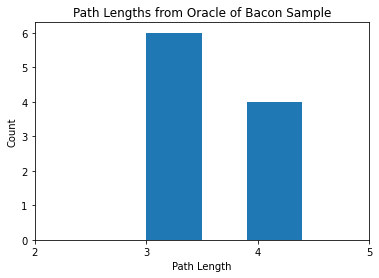

In [67]:
plt.hist(data['Path Length'], width = 0.5)
plt.title('Path Lengths from Oracle of Bacon Sample')
plt.xlabel('Path Length')
plt.ylabel('Count')
plt.xticks([2,3,4,5])
plt.show()

In [ ]:
mean = np.mean(data['Path Length'])
print("The APL of the sample is", mean)

The APL of the sample is 3.4


### Discussion

In order to perform this task, I created a CSV file with the actors names and each pairs path length. After converting it into a pandas dataframe, I used MatPlotLib to create a histogram showing the distribution of every pairs path length. After completing the chart, I used the mean function from Numpy to caculate the mean of the entire path length column, which returned an APL of 3.4. Note (Data visualization is not my strong suit so I apologize for the unpolished chart). 

## References

DATA 340-02 - Chapter 02 - Small worlds, https://github.com/anwala/teaching-network-science/blob/main/spring-2023/week-3/data_340_02_s23_chp_02_small_worlds.ipynb

The Oracle of Bacon, http://oracleofbacon.org/